## Setting up python environment

In [1]:
import numpy as np # pyton library for linear algebra
import pandas as pd # python library for data processing (data manipulation and analysis)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


### Setting up training and testing data

As the training dataset is too large, we can not load whole dataset at the same time. So, we are skipping some part of the data.

In [2]:
train_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000)

In [3]:
test_df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')

In [4]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
# dataset shape

print('train_df: ' + str(train_df.shape))
print('test_df: ' + str(test_df.shape))

train_df: (10000000, 8)
test_df: (9914, 7)


In [7]:
# looking some sample data

train_df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
# describe training data

train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


# PART 1 -> DATA CLEANSING

## Cleaning NaN / null values

In [9]:
# count and check how many null/missing values in training data

print(train_df.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64


In [10]:
# remove all null valued fields from the training datset

print('Training data: Previous size: ' + str(len(train_df)))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('Training data: Updated size: ' + str(len(train_df)))

Training data: Previous size: 10000000
Training data: Updated size: 9999931


## Remove negative fare amount

Fare amount can not be zero or negative. So, we can remove these fields.

In [11]:
# check the target column first
train_df['fare_amount'].describe()

count    9.999931e+06
mean     1.133849e+01
std      9.799845e+00
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

###### yes, negative values exist
# count how many negative and Zero values are here

from collections import Counter
Counter(train_df['fare_amount'] < 0) and fare can't be zero!

In [12]:
from collections import Counter
Counter(train_df['fare_amount'] <= 0)

Counter({False: 9999242, True: 689})

In [13]:
# remove these fields from dataset
print('before: ' + str(train_df.shape))
train_df = train_df.drop(train_df[train_df['fare_amount'] <= 0].index, axis = 0)
print('after: ' + str(train_df.shape))

before: (9999931, 8)
after: (9999242, 8)


In [14]:
# now check again

train_df['fare_amount'].describe()

count    9.999242e+06
mean     1.133966e+01
std      9.798609e+00
min      1.000000e-02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

no more invalied fare value, yahoooo!

## Check passenger_count variable

In [15]:
train_df['passenger_count'].describe()

count    9.999242e+06
mean     1.684807e+00
std      1.323424e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [16]:
train_df['passenger_count'].sort_values(ascending=False)

2154045    208
2910347    208
4103745    208
3107489    208
7001143    208
          ... 
2550560      0
9688764      0
189239       0
6344835      0
7974314      0
Name: passenger_count, Length: 9999242, dtype: int64

The number of passenger must be at least one. On the other hand, a stranded size taxi can't have passengers more than 6. That is we're only keeping the rows, those have passengers [1, 6]

In [17]:
# remove these fields from dataset
print('before: ' + str(train_df.shape))
train_df = train_df.drop(train_df[train_df['passenger_count'] <= 0].index, axis = 0) # remove numbers less or equal 0
train_df = train_df.drop(train_df[train_df['passenger_count'] > 6].index, axis = 0) # remove numbers greater or equal 0
print('after: ' + str(train_df.shape))

before: (9999242, 8)
after: (9963965, 8)


In [18]:
train_df['passenger_count'].describe()

count    9.963965e+06
mean     1.690557e+00
std      1.306525e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

# Feature Engineering

In [19]:
# calculate logtitude and latitude dif and add as feature

def add_distance_dif_features(df):
    df['longitude_distance'] = abs(df['pickup_longitude'] - df['dropoff_longitude'])
    df['latitude_distance'] = abs(df['pickup_latitude'] - df['dropoff_latitude'])
    return df
    
train_df = add_distance_dif_features(train_df)

In [20]:
# calculate straight distance and add as feature

def calculate_add_distance_feature(df):
    df['distance'] = (df['longitude_distance'] ** 2 + df['latitude_distance'] ** 2) ** .5
    return df
    
train_df = calculate_add_distance_feature(train_df)

In [21]:
# remove unlealistic distance valued fields from dataset
# we assume unrealistic distnace which are less than 0.1 miles

def drop_unrealistic_distance(df):
    print('before: ' + str(df.shape))
    df = df.drop(df[train_df['distance'] < 0.01].index, axis = 0)
    print('after: ' + str(df.shape))
    return df
    
train_df = drop_unrealistic_distance(train_df)

before: (9963965, 11)
after: (8224381, 11)


In [22]:
train_df.groupby('passenger_count')['distance','fare_amount'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,distance,fare_amount
passenger_count,,
1,0.325402,12.198541
2,0.263791,12.840180
3,0.260806,12.545002
4,0.307009,12.743767
5,0.227303,12.284363
6,0.390197,13.371031


In [23]:
print(f'average_fare: {train_df.fare_amount.sum()/train_df.distance.sum()}')

average_fare: 40.19018345014175


#### Time Range of train and test dataset

In [24]:
def print_time_range(df1, df2):
    train_df_time_start = df1.pickup_datetime.min()
    train_df_time_end = df1.pickup_datetime.max()
    print("Train Datqaset Time Starts: {}, Ends {}".format(train_df_time_start, train_df_time_end))
    
    test_df_time_start = df2.pickup_datetime.min()
    test_df_time_end = df2.pickup_datetime.max()
    print("Test Dataset Time Starts: {}, Ends {}".format(test_df_time_start, test_df_time_end))

print_time_range(train_df, test_df)

Train Datqaset Time Starts: 2009-01-01 00:00:46 UTC, Ends 2015-06-30 23:59:54 UTC
Test Dataset Time Starts: 2009-01-01 11:04:24 UTC, Ends 2015-06-30 20:03:50 UTC


### Plots and Diagrams

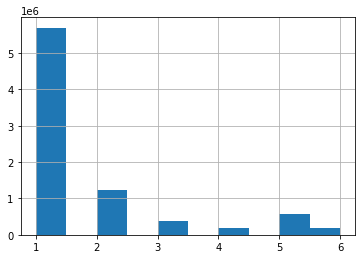

In [25]:
train_df.passenger_count.hist()

(0.0, 100.0)

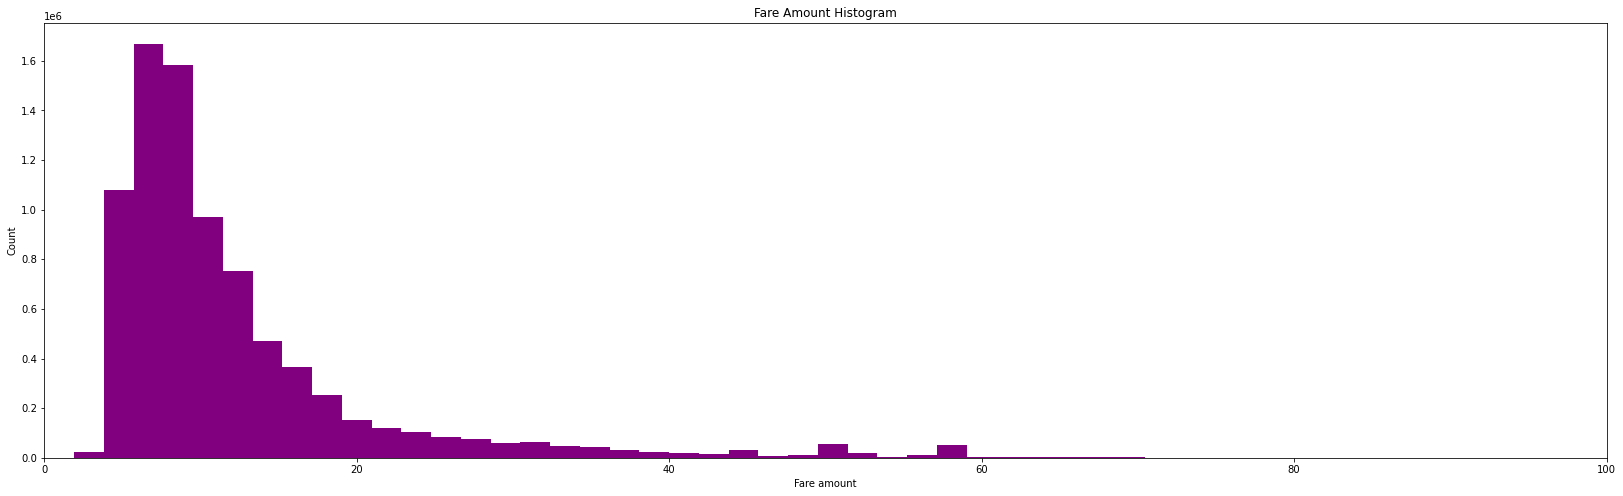

In [26]:
plt.figure(figsize=(28,8))
plt.hist(train_df["fare_amount"], 500, facecolor="purple")
plt.xlabel("Fare amount")
plt.ylabel("Count")
plt.title("Fare Amount Histogram")
plt.xlim(0,100)

Text(0, 0.5, 'Frequency')

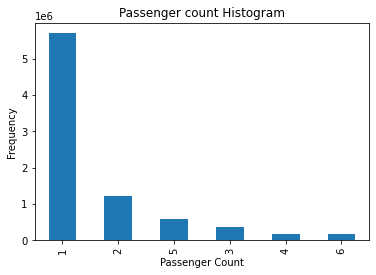

In [27]:
train_df["passenger_count"].value_counts().plot.bar()
plt.title("Passenger count Histogram")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")

In [28]:
train_df.distance.describe()

count    8.224381e+06
mean     3.073621e-01
std      1.539901e+01
min      1.000000e-02
25%      1.675648e-02
50%      2.570094e-02
75%      4.397095e-02
max      7.548848e+03
Name: distance, dtype: float64

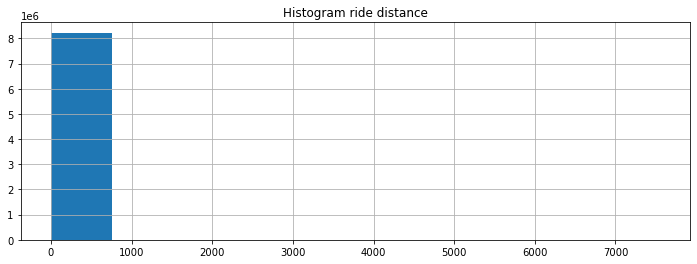

In [29]:
train_df["distance"].hist(figsize=(12,4))
plt.title("Histogram ride distance");

In [30]:
train_df["fare_per_distance"] = train_df["fare_amount"] / train_df["distance"]
train_df["fare_per_distance"].describe()

count    8.224381e+06
mean     3.745553e+02
std      1.526987e+02
min      1.183805e-04
25%      2.830627e+02
50%      3.509738e+02
75%      4.348068e+02
max      1.891399e+04
Name: fare_per_distance, dtype: float64

Text(0.5, 1.0, 'Scatter DIagram of fare-amount')

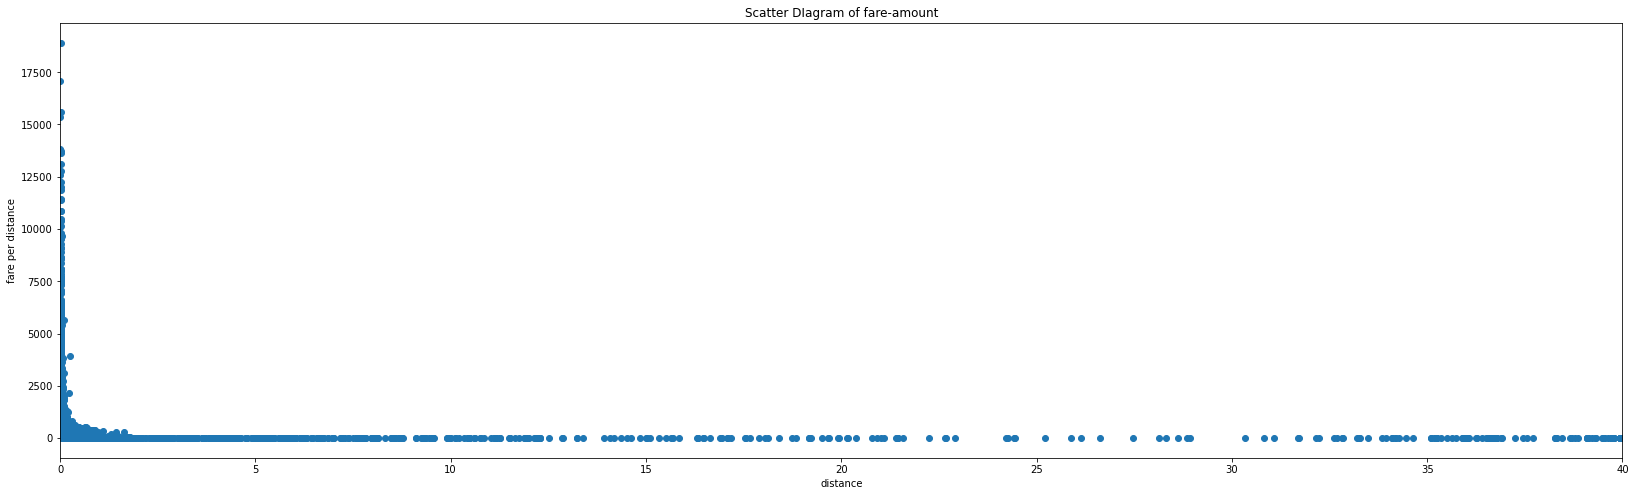

In [31]:
plt.figure(figsize=(28,8))
plt.scatter(train_df["distance"], train_df["fare_per_distance"])
plt.xlabel("distance")
plt.ylabel("fare per distance")
plt.xlim(0,40)
plt.title("Scatter DIagram of fare-amount")

In [32]:
def add_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.replace(" UTC", "")
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['hour'] = df.pickup_datetime.dt.hour
    #df['week'] = df.pickup_datetime.dt.week
    df['weekday'] = df.pickup_datetime.dt.weekday
    df['month'] = df.pickup_datetime.dt.month
    df['year'] = df.pickup_datetime.dt.year
    
    return df

train_df = add_time_features(train_df)

In [33]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,distance,fare_per_distance,hour,weekday,month,year
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.079696,212.056690,16,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.013674,416.848376,0,3,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.025340,303.861732,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.019470,272.220407,7,1,3,2010
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603,0.038675,312.863485,9,3,1,2011


Text(0.5, 1.0, 'Fare variation in years')

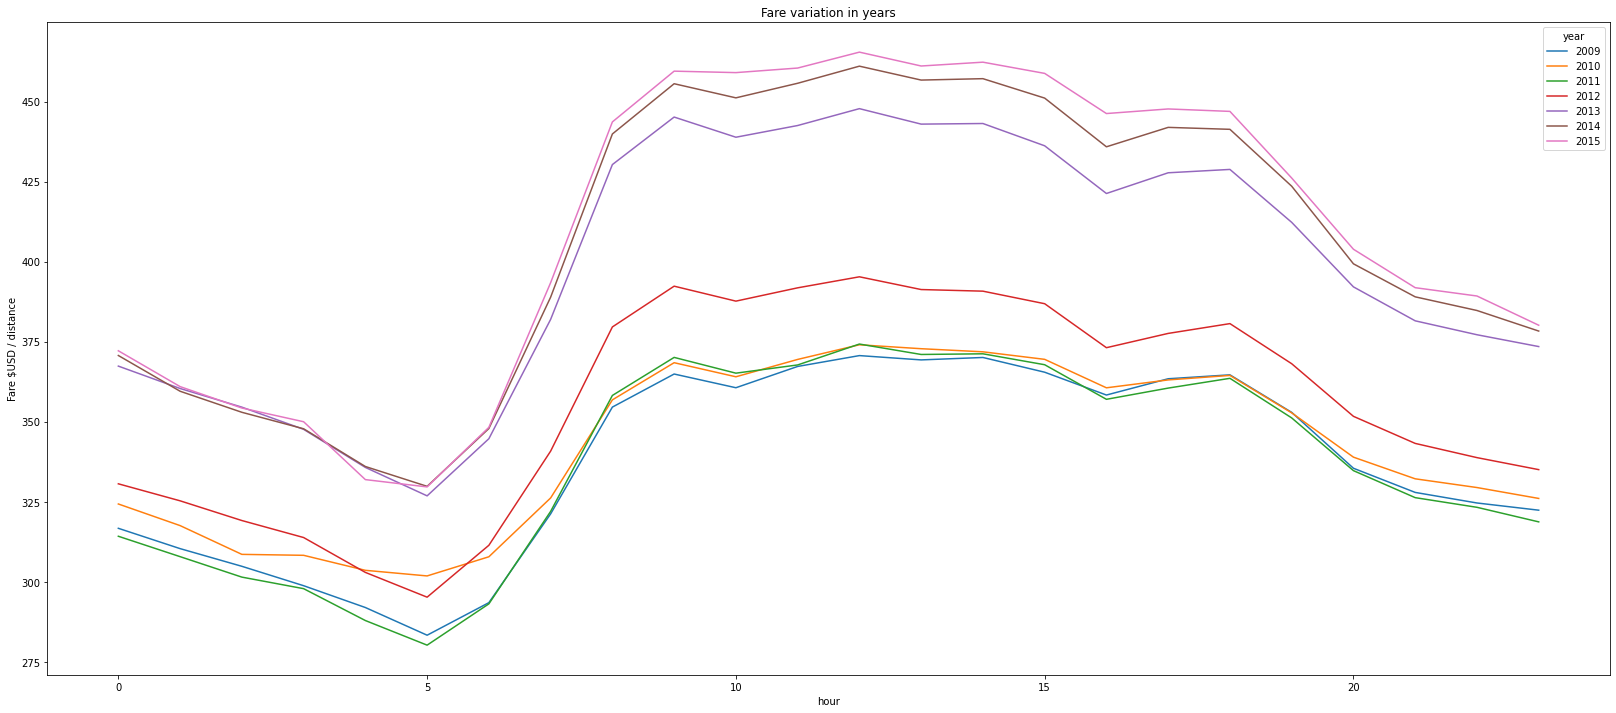

In [34]:
#train_df['hour'] = train_df["pickup_datetime"].apply(lambda t: pd.to_datetime(t).hour)
#train_df['year'] = train_df["pickup_datetime"].apply(lambda t: pd.to_datetime(t).year)
#train_df['weekday'] = train_df["pickup_datetime"].apply(lambda t: pd.to_datetime(t).weekday())
train_df.pivot_table("fare_per_distance", index="hour", columns="year").plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in years")

In [35]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,distance,fare_per_distance,hour,weekday,month,year
count,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06,8.224381e+06
mean,1.235294e+01,-7.383737e+01,4.065059e+01,-7.383914e+01,4.065062e+01,1.692171e+00,2.444028e-01,1.471858e-01,3.073621e-01,3.745553e+02,1.352322e+01,3.055804e+00,6.278639e+00,2.011753e+03
std,9.813382e+00,8.501846e+00,7.732585e+00,8.247128e+00,7.606393e+00,1.305173e+00,1.165078e+01,1.006985e+01,1.539901e+01,1.526987e+02,6.589296e+00,1.953371e+00,3.426042e+00,1.862018e+00
min,1.000000e-02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.461541e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.183805e-04,0.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
25%,6.900000e+00,-7.399247e+01,4.073564e+01,-7.399165e+01,4.073452e+01,1.000000e+00,8.941000e-03,1.008126e-02,1.675648e-02,2.830627e+02,9.000000e+00,1.000000e+00,3.000000e+00,2.010000e+03
50%,9.300000e+00,-7.398215e+01,4.075286e+01,-7.398037e+01,4.075347e+01,1.000000e+00,1.542900e-02,1.733300e-02,2.570094e-02,3.509738e+02,1.400000e+01,3.000000e+00,6.000000e+00,2.012000e+03
75%,1.370000e+01,-7.396829e+01,4.076747e+01,-7.396455e+01,4.076847e+01,2.000000e+00,2.717300e-02,3.091300e-02,4.397095e-02,4.348068e+02,1.900000e+01,5.000000e+00,9.000000e+00,2.013000e+03
max,9.520000e+02,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,6.000000e+00,6.755629e+03,5.501513e+03,7.548848e+03,1.891399e+04,2.300000e+01,6.000000e+00,1.200000e+01,2.015000e+03


Text(0.5, 1.0, 'Fare variation in month')

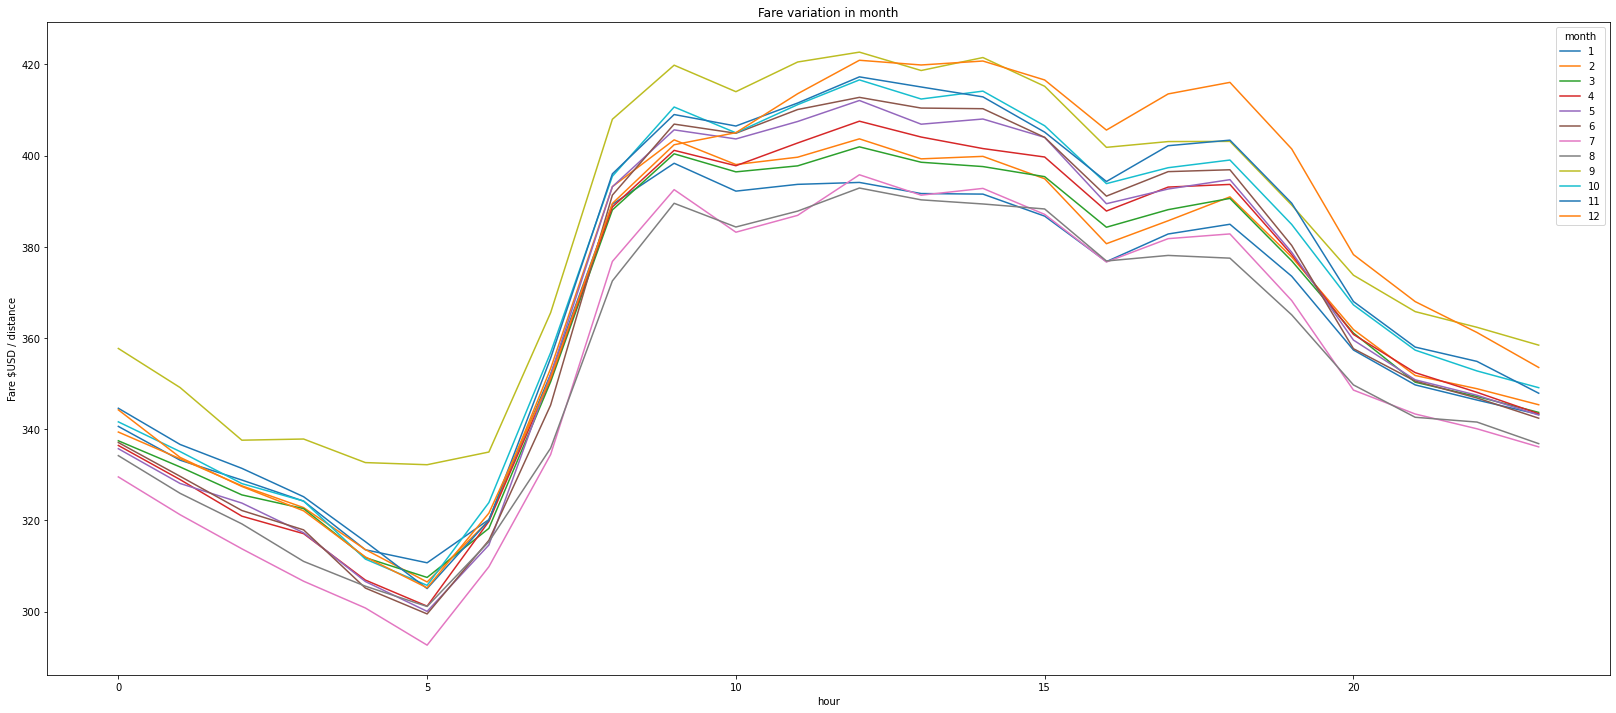

In [36]:
train_df.pivot_table("fare_per_distance", index="hour", columns="month").plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in month")

Text(0.5, 1.0, 'Fare variation in week days')

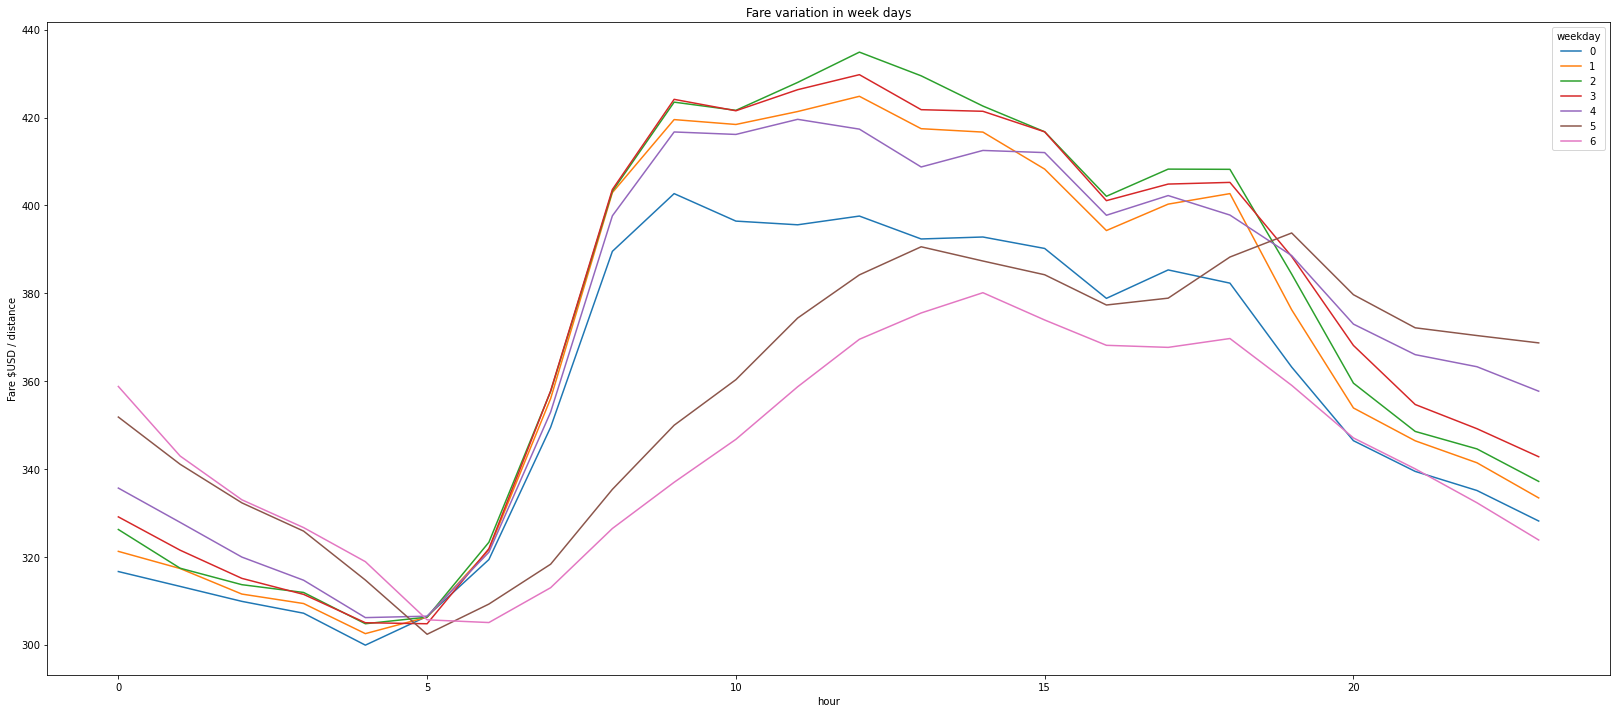

In [37]:
train_df.pivot_table("fare_per_distance", index="hour", columns="weekday").plot(figsize=(28,12))
plt.ylabel("Fare $USD / distance");
plt.title("Fare variation in week days")

Text(0.5, 1.0, 'Zoom in on distance < 15  and fare < $100')

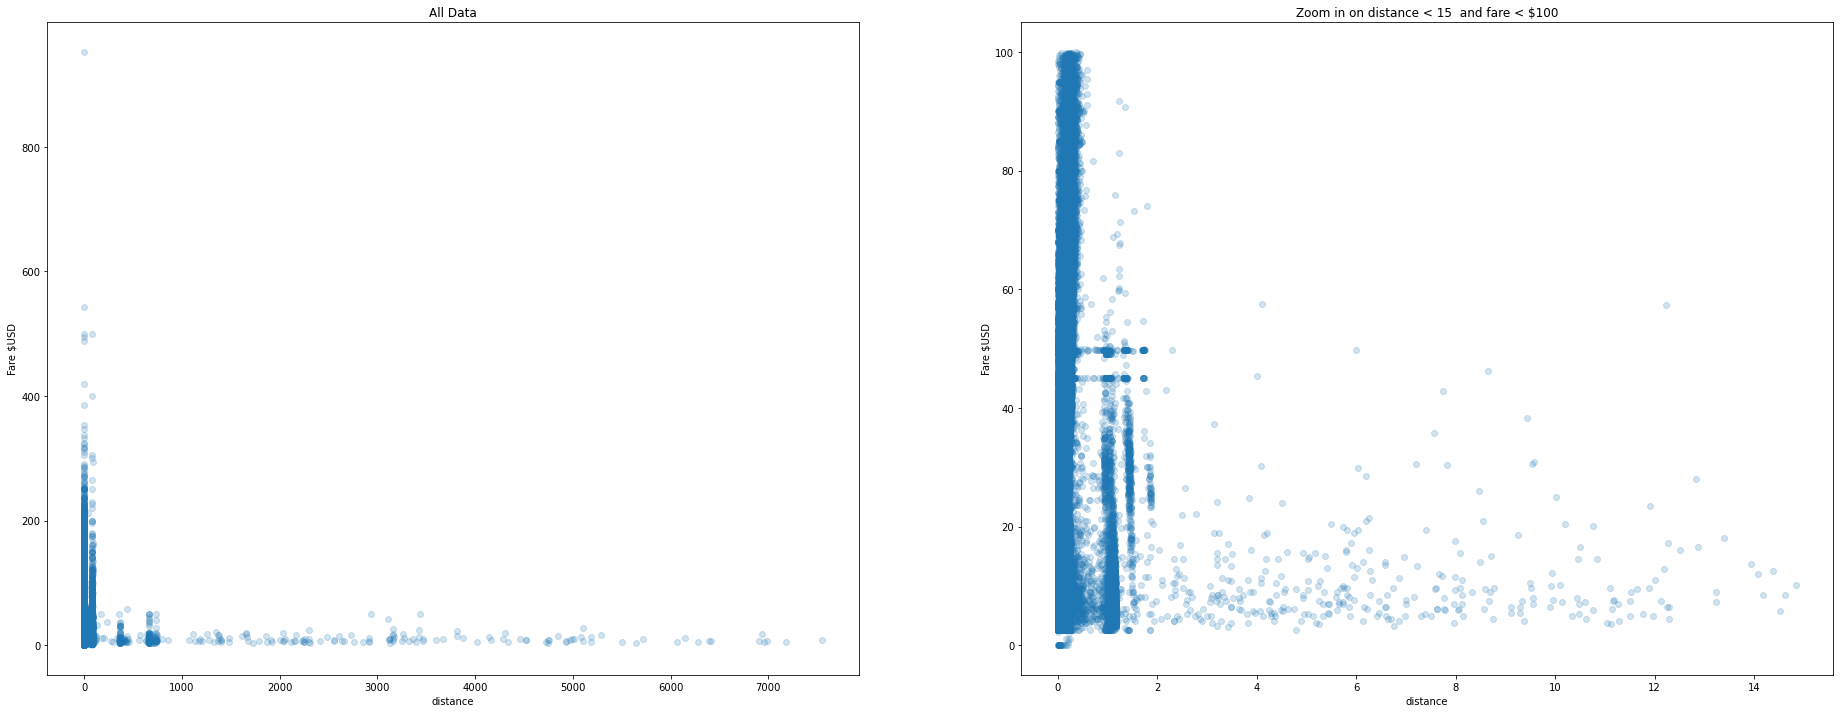

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(32,12))
axs[0].scatter(train_df["distance"], train_df["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

idx = ((train_df['distance'] < 15) & (train_df["fare_amount"] < 100))
axs[1].scatter(train_df[idx]["distance"], train_df[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15  and fare < $100")

### Train our model

In [39]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
longitude_distance           float64
latitude_distance            float64
distance                     float64
fare_per_distance            float64
hour                           int64
weekday                        int64
month                          int64
year                           int64
dtype: object

In [40]:
train_df.shape

(8224381, 16)

In [41]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,distance,fare_per_distance,hour,weekday,month,year
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.079696,212.056690,16,1,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.013674,416.848376,0,3,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.025340,303.861732,4,5,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.019470,272.220407,7,1,3,2010
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603,0.038675,312.863485,9,3,1,2011


Our model will take the form  X⋅w=y  where  X  is a matrix of input features, and  y  is a column of the target variable, fare_amount, for each row. The weight column  w  is what we will "learn".

First let's setup our input matrix  X  and target column  y  from our training set. The matrix  X  should consist of the two GPS coordinate differences, plus a third term of 1 to allow the model to learn a constant bias term. The column  y  should consist of the target fare_amount values.

In [42]:
# Construct and return an Nx3 input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack((df.passenger_count, df.longitude_distance, df.latitude_distance, df.distance, df.hour, df.weekday, df.month, df.year, np.ones(len(df))))

train_X = get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(8224381, 9)
(8224381,)


In [43]:
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[ 1.17226317e-01  1.56755040e-02  1.22347660e-02 -1.44528738e-02
 -3.02436198e-02 -2.22568186e-02  1.13357319e-01  7.17530547e-01
 -1.43157532e+03]


In [44]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[ 1.17226318e-01  1.56755040e-02  1.22347660e-02 -1.44528738e-02
 -3.02436198e-02 -2.22568186e-02  1.13357319e-01  7.17530547e-01
 -1.43157532e+03]


In [45]:
test_df = add_distance_dif_features(test_df)
test_df = calculate_add_distance_feature(test_df)
test_df = add_time_features(test_df)
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,distance,hour,weekday,month,year
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,0.021554,13,1,1,2015
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,0.023180,13,1,1,2015
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,0.005870,11,5,10,2011
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,0.018649,21,5,12,2012
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,0.050631,21,5,12,2012


In [46]:
test_X = get_input_matrix(test_df)
print(test_X.shape)

(9914, 9)


In [47]:
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

In [48]:
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission1.csv', index = False)

print(os.listdir('.'))

['__notebook__.ipynb', 'submission1.csv']
